In [1]:
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns

In [16]:
# The code was removed by Watson Studio for sharing.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [17]:
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [18]:
life_data = life_data.drop(['Status'], axis=1)
life_data = life_data.drop(['Year'], axis=1)
life_data.columns


Index(['Country', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [19]:
life_data = life_data.groupby('Country').mean()
life_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375


In [20]:
life_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

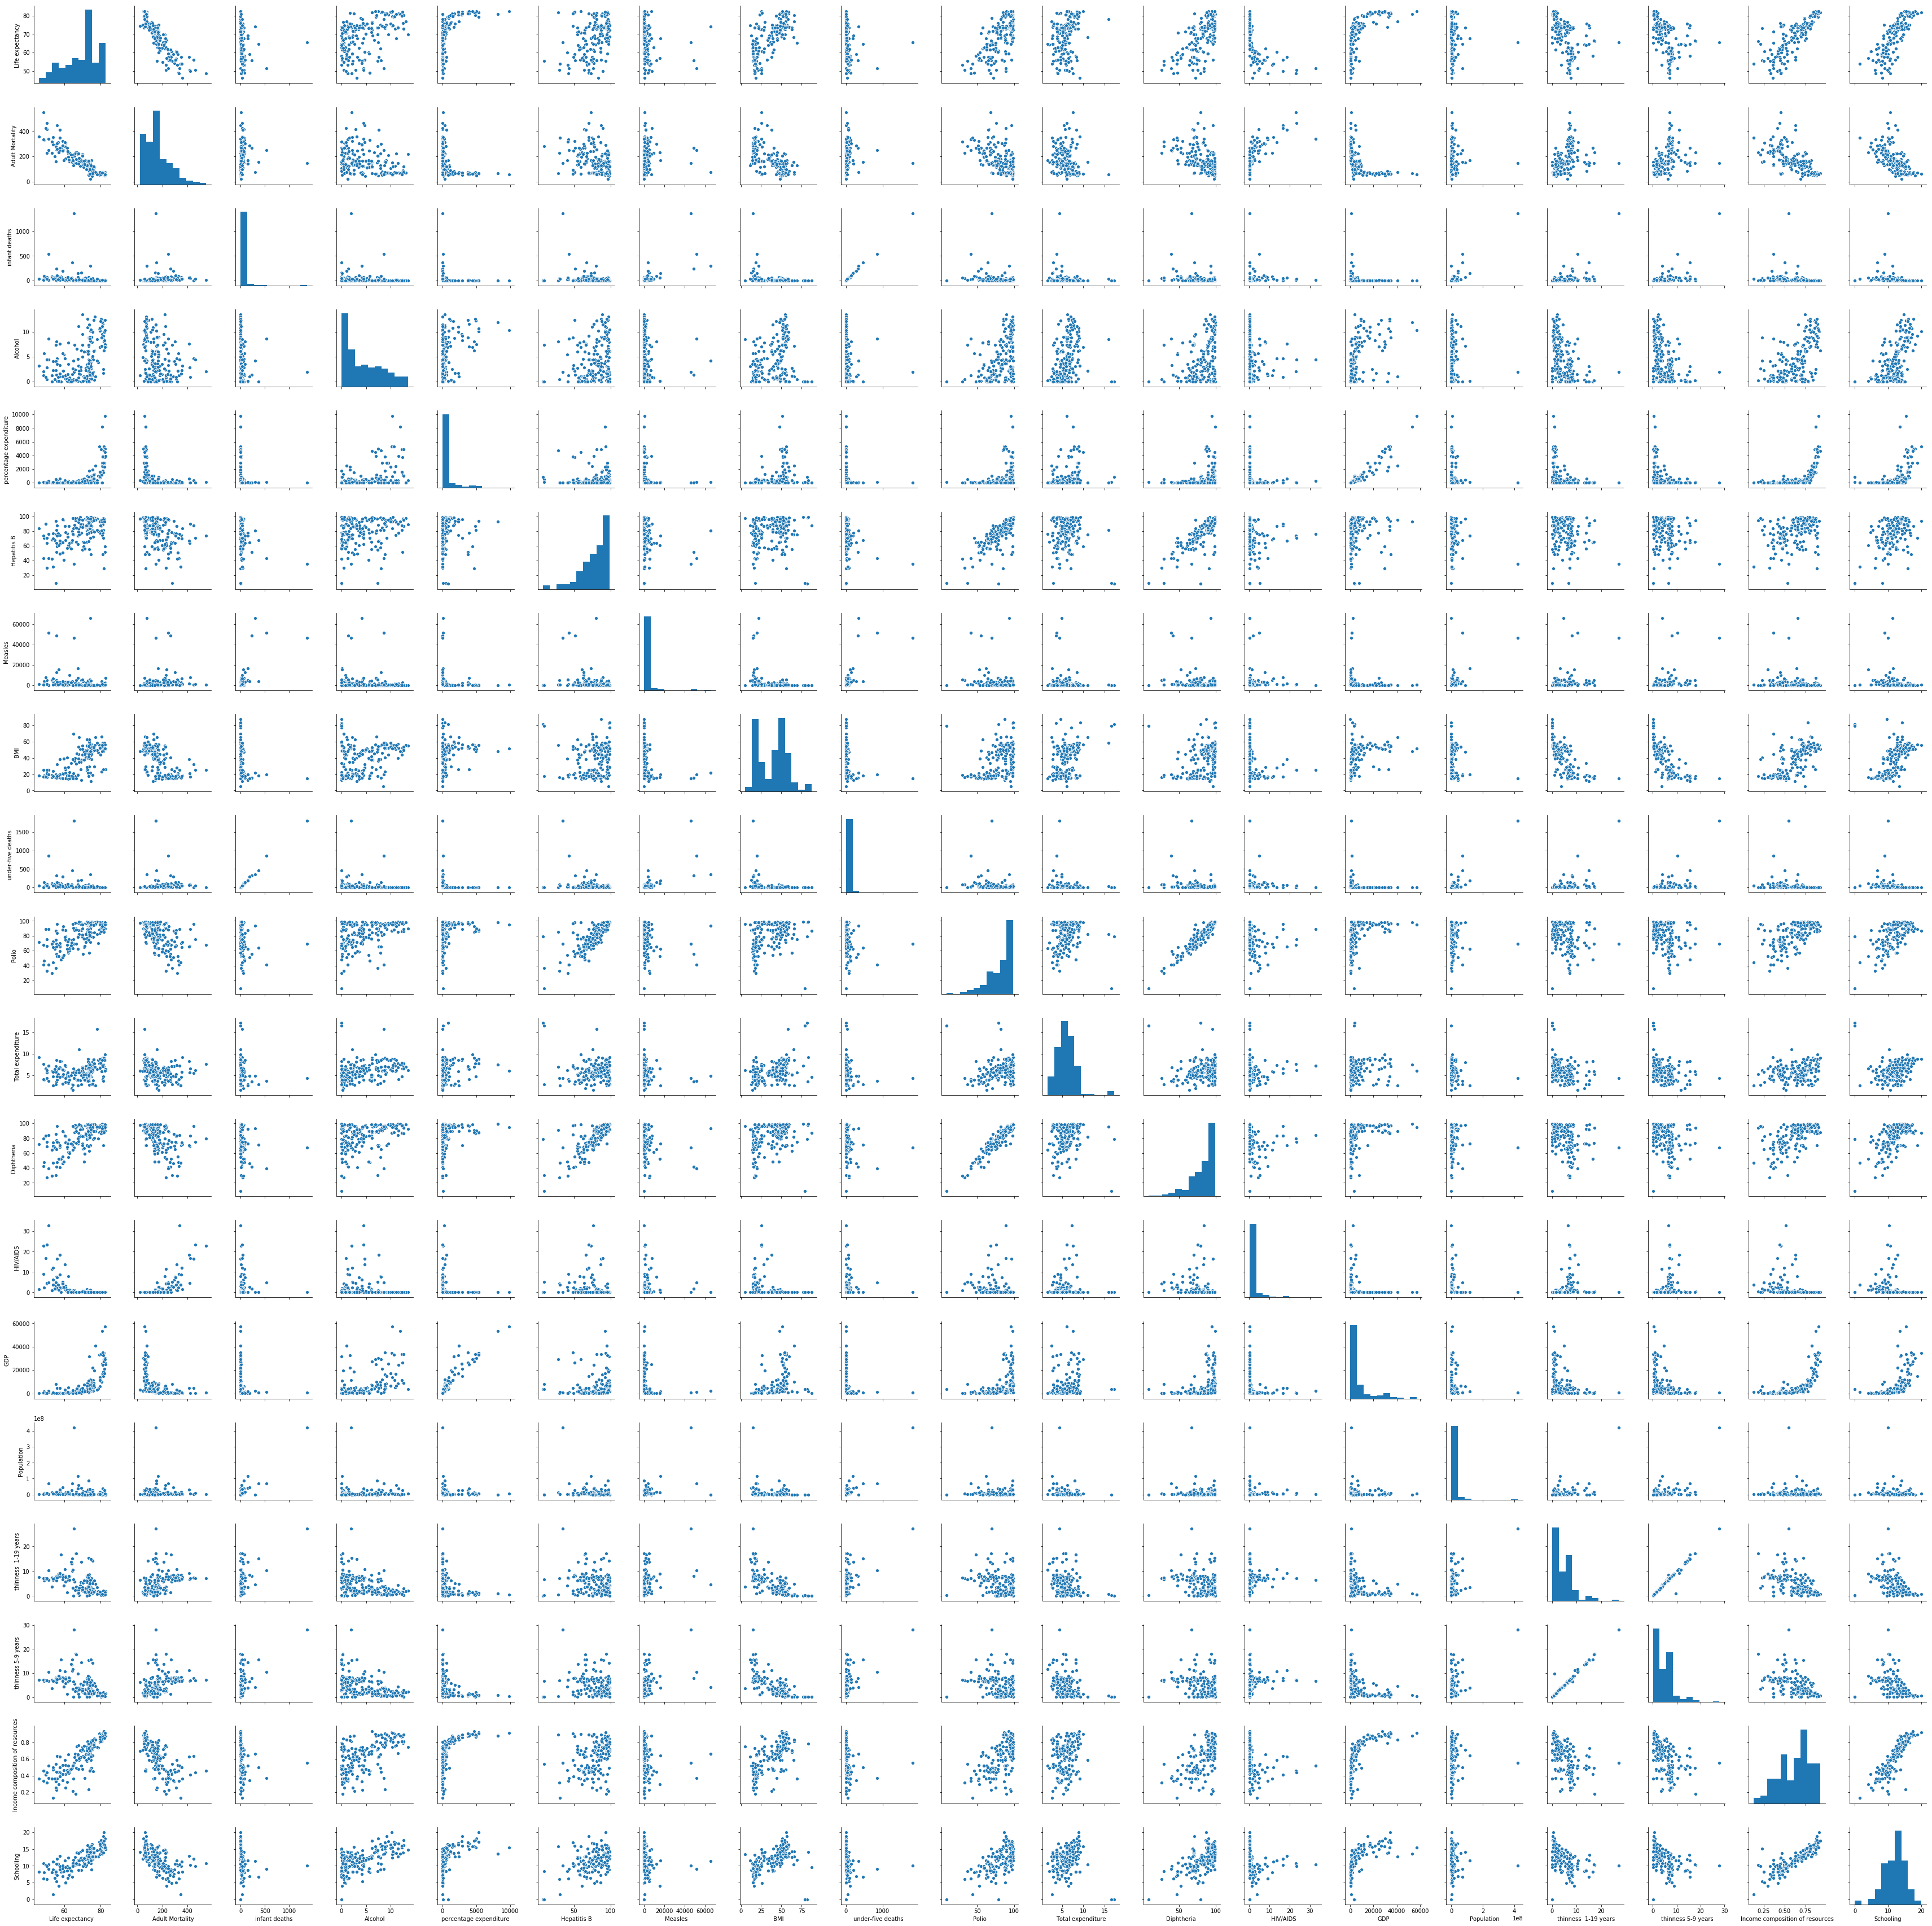

In [21]:
sns.pairplot(life_data)

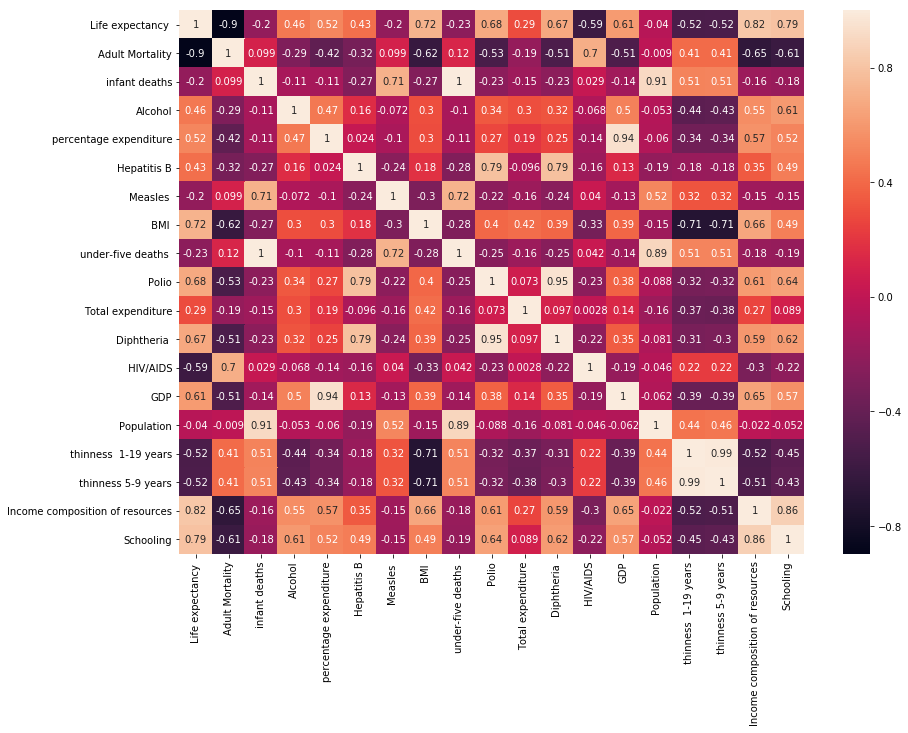

In [22]:
plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True)

In [24]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ', axis = 1)

In [25]:
life_features.isnull().head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [26]:
life_features.isnull().sum()

Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
dtype: int64

In [27]:
life_features.fillna(value = life_features.mean(), inplace = True)

In [28]:
life_labels.fillna(value = life_labels.mean(), inplace = True)

In [29]:
stats.describe(life_features[1:])

DescribeResult(nobs=192, minmax=(array([1.87500000e+01, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 5.20000000e+00, 0.00000000e+00,
       9.00000000e+00, 1.64666667e+00, 9.00000000e+00, 1.00000000e-01,
       1.36183210e+02, 2.92000000e+02, 1.00000000e-01, 1.00000000e-01,
       1.31687500e-01, 0.00000000e+00]), array([5.50062500e+02, 1.36668750e+03, 1.34973333e+01, 9.80181038e+03,
       9.90000000e+01, 6.58579375e+04, 8.73000000e+01, 1.81250000e+03,
       9.90000000e+01, 1.72400000e+01, 9.90000000e+01, 3.29437500e+01,
       5.73628746e+04, 4.21467691e+08, 2.71000000e+01, 2.79437500e+01,
       9.31437500e-01, 2.00375000e+01])), mean=array([1.64253396e+02, 2.85745443e+01, 4.46296480e+00, 7.12321318e+02,
       7.85909681e+01, 2.30174674e+03, 3.96797168e+01, 3.96419271e+01,
       8.26078218e+01, 6.01668050e+00, 8.23842541e+01, 1.67047526e+00,
       7.25930328e+03, 1.25835883e+07, 4.62089964e+00, 4.65416339e+00,
       6.30617733e-01, 1.19

In [30]:
min_max_scaler = MinMaxScaler()
life_features = min_max_scaler.fit_transform(life_features)

In [31]:
life_features

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        5.56004489e-01, 3.54720225e-01, 4.09856519e-01],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        5.74635241e-02, 7.22960300e-01, 6.05739239e-01],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        2.10998878e-01, 7.04204439e-01, 6.34435434e-01],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.90235690e-01, 4.29899969e-01, 4.24516532e-01],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        2.39281706e-01, 4.58580807e-01, 5.59575795e-01],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        2.47362514e-01, 3.84417005e-01, 4.90330630e-01]])

In [32]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(
        life_features, life_labels, train_size = 0.7, test_size = 0.3)

In [33]:
#random forest
random_forest_model = RandomForestRegressor()

In [34]:
random_forest_fit = random_forest_model.fit(life_features_train, life_labels_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
random_forest_score = cross_val_score(random_forest_fit, life_features_train, life_labels_train, cv = 5)


In [36]:
print("mean cross validation score: %.2f"% np.mean(random_forest_score))
print("score without cv: %.2f"% random_forest_fit.score(life_features_train, life_labels_train))
print("R^2 score on the test data %.2f"%r2_score(life_labels_test, random_forest_fit.predict(life_features_test)))



mean cross validation score: 0.90
score without cv: 0.98
R^2 score on the test data 0.91


In [37]:
random_forest_model_predict = random_forest_model.predict(life_features_test)


In [38]:
scoring = make_scorer(r2_score)

In [39]:
grid_cv = GridSearchCV(RandomForestRegressor(),param_grid={'min_samples_split': range(2, 10)},scoring=scoring, cv=5, refit=True)


In [40]:
grid_cv.fit(life_features_train, life_labels_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(r2_score), verbose=0)

In [41]:
grid_cv.best_params_

{'min_samples_split': 3}

In [42]:
result = grid_cv.cv_results_

In [43]:
print("Best Parameters: " + str(grid_cv.best_params_))

Best Parameters: {'min_samples_split': 3}


In [44]:
result = grid_cv.cv_results_

In [45]:
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"% r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, random_forest_model_predict))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, random_forest_model_predict))

R^2 score on training data: 0.98
R^2 score: 0.91
Mean squared error: 7.78
Mean absolute error: 1.80


In [46]:
!pip install watson-machine-learning-client

In [47]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-05-31 21:57:51,237 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [48]:
wml_credentials={
  "apikey": "9ssfGOo-2D5EerEpVijFvOTGfa-P3kIckWTbCAfGSE2g",
    "instance_id": "80655950-53a2-4f05-ac75-2e0ab3eab176",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [49]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [50]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "sagar", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "sagar.sharma2017@vitstudent.ac.in", 
               client.repository.ModelMetaNames.NAME: "life_data"}

In [51]:
model_artifact =client.repository.store_model(grid_cv, meta_props=model_props)

In [52]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [53]:
published_model_uid

'57993046-70d4-4aaa-aacc-52d09dc95b73'

In [54]:
deployment = client.deployments.create(published_model_uid, name="life_data")



#######################################################################################

Synchronous deployment creation for uid: '57993046-70d4-4aaa-aacc-52d09dc95b73' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e2ff2d40-53db-4e62-b073-edbf28722220'
------------------------------------------------------------------------------------------------




In [55]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [56]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/80655950-53a2-4f05-ac75-2e0ab3eab176/deployments/e2ff2d40-53db-4e62-b073-edbf28722220/online'

In [57]:
print(grid_cv.predict([[263,62,0.01,71.27,65,1154,19.1,83,6,8.16,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1]]))


[55.441875]
